In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

#### Carregar dataset 

In [2]:
base = datasets.load_digits()

In [3]:
base

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

#### Normalização dos dados

In [4]:
previsores = np.asarray(base.data, 'float32')
classe = base.target

In [5]:
normalizador = MinMaxScaler(feature_range=(0,1))
previsores = normalizador.fit_transform(previsores)

In [6]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.2, random_state=0)

#### Redução da dimensionalidade com RBM

In [7]:
rbm = BernoulliRBM(random_state=0)
rbm.n_iter = 25
rbm.n_components = 50
mlp_rbm = MLPClassifier()
classificador_rbm = Pipeline(steps = [('rbm', rbm), ('mlp', mlp_rbm)])
classificador_rbm.fit(previsores_treinamento, classe_treinamento)

/home/victorhugo/Documentos/Faculdade/Projetos/envs/cursoDeepLearning/lib/python3.5/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=50,
                              n_iter=25, random_state=0, verbose=0)),
                ('mlp',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=Fals

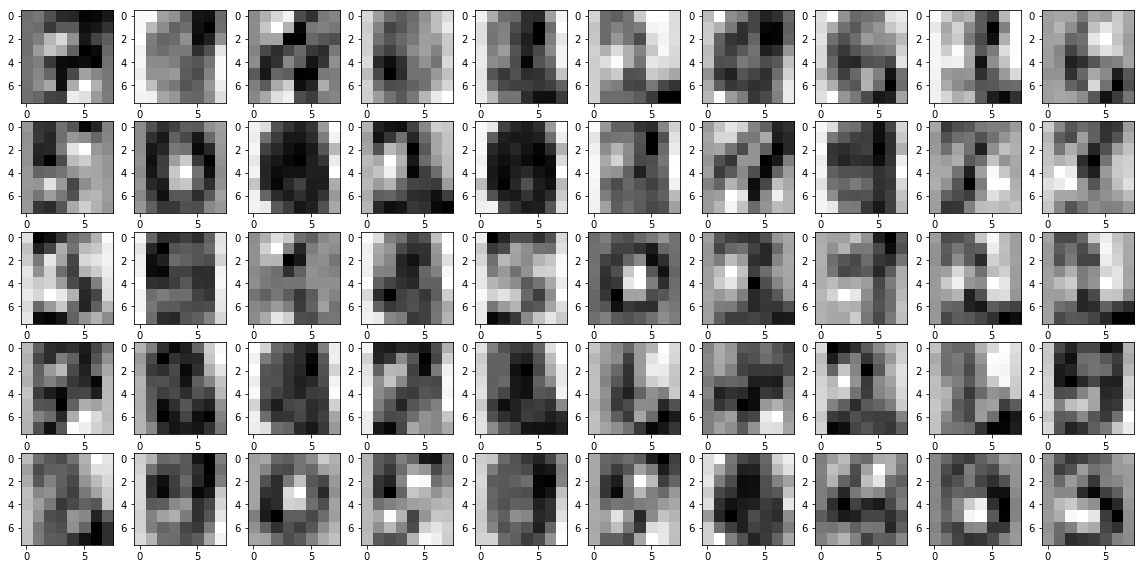

In [8]:
plt.figure(figsize=(20,20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10,10,i+1)
    plt.imshow(comp.reshape((8,8)), cmap = plt.cm.gray_r)
    plt.xticks()
    plt.yticks()
plt.show()
    

#### Treinamento e predição com os dados redimencionados

In [9]:
previsores_rbm = classificador_rbm.predict(previsores_teste)

In [10]:
precisao_rbm = metrics.accuracy_score(previsores_rbm, classe_teste)

In [11]:
precisao_rbm

0.9305555555555556

#### Treinamento e predição com dados não redimencionados

In [12]:
mlp_simples = MLPClassifier()

In [13]:
mlp_simples.fit(previsores_treinamento, classe_treinamento)
previsoes_mlp = mlp_simples.predict(previsores_teste)
precisao_mlp = metrics.accuracy_score(previsoes_mlp, classe_teste)

/home/victorhugo/Documentos/Faculdade/Projetos/envs/cursoDeepLearning/lib/python3.5/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [14]:
precisao_mlp

0.9777777777777777